<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/day1_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B6%84%EB%A5%98%EA%B8%B0%EB%A5%BC_%EB%A7%8C%EB%93%A4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 : 가위바위보 분류기를 만들자

# 모델 학습 (노드 진행)

데이터를 준비하자
___

🔶 데이터 만들기


(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요?

걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다.

아래 사이트에서 Get Started 버튼을 눌러보세요.

그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

https://teachablemachine.withgoogle.com/


(2) 먼저 가위 이미지 데이터를 만들어 봅시다.

웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다.

딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

여러 각도에서 찍어보세요.

여러 크기로 찍어보세요.

혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.

좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
2.0.2


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
        images=glob.glob(img_path + "/*.jpg")

        print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
        target_size=(28,28)
        for img in images:
                old_img=Image.open(img)
                new_img=old_img.resize(target_size, Image.Resampling.LANCZOS)
                new_img.save(img, "JPEG")

        print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/scissor"
resize_images(image_dir_path1)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/rock"
resize_images(image_dir_path2)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path3 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/paper"
resize_images(image_dir_path3)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


예시 코드


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [7]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


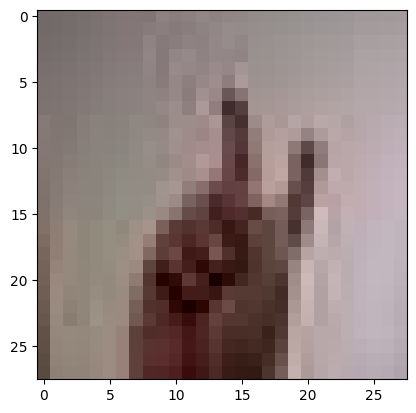

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기
___
자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [9]:
# 모델 정의
import tensorflow as tf
from tensorflow import keras
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# (1) input_shape의 3번째 값이 1 --> 3
# (2) 마지막 Dense의 출력값이 10 --> 3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,819 (120.39 KB)

 Trainable params: 30,819 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

딥러닝 네트워크 학습시키기
___

잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [19]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7917 - loss: 1.0450
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9318 - loss: 0.9120
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9769 - loss: 0.6847
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9740 - loss: 0.4552
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9140 - loss: 0.3419
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8598 - loss: 0.3281
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9592 - loss: 0.2037
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9960 - loss: 0.1311
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9966 - loss: 0.1030
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0753


얼마나 잘 만들었는지 확인하기(테스트)
___

여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다.
그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)

In [11]:
# 전처리: 리사이징
image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [12]:
# 데이터 불러오기
image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/"

(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [21]:
# 분류 결과
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 26ms/step - accuracy: 0.3333 - loss: 5.1017
test_loss: 5.101677417755127 
test_accuracy: 0.3333333432674408


## 시도1. 모델 파라미터 수정
___
- 필터 숫자와 epoch 횟수를 수정한 다음 학습을 진행하였습니다.
  - n_channel_1 : 16 -> 32
  - n_channel_2 : 32 -> 64
  - n_dense : 32 -> 64
  - n_train_epoch : 10 -> 30

In [27]:
# 모델 정의
n_channel_1=32  #  16 -> 32
n_channel_2=64 # 32 -> 64
n_dense=64       # 32 -> 64
n_train_epoch=30 # 10 -> 30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,051 (476.76 KB)

 Trainable params: 122,051 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3939 - loss: 1.0868
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6468 - loss: 0.9306
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9172 - loss: 0.6809
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9490 - loss: 0.3844
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9574 - loss: 0.2565
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9723 - loss: 0.1588
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0926
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0754
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0331
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0253
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0183
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy:

In [31]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 1s - 77ms/step - accuracy: 0.3333 - loss: 12.7561
test_loss: 12.756109237670898 
test_accuracy: 0.3333333432674408


첫번째 시도 (그대로)
___
- `accuracy`: 0.3333
- `loss`: 5.1017

두번째 시도 (파라미터 값 2배수 조정)
___
- `accuracy`: 0.3333
- `loss`: 12.7561


## 시도2. 학습 데이터 수정
___
- 제 데이터가 학습에 적합하지 않는 것으로 보여서 데이터를 모두 합친다음, 30% 만 검증 데이터로 활용하였습니다.
- 파라미터의 경우, epoch만 그대로 10으로 변경하였습니다.

In [105]:
# train/test split
from sklearn.model_selection import train_test_split

image_dir_path_user1 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/"
x_user1, y_user1 = load_data(image_dir_path_user1)

image_dir_path_user2 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/"
x_user2, y_user2 = load_data(image_dir_path_user2)

x_combined = np.concatenate((x_user1, x_user2), axis=0)
y_combined = np.concatenate((y_user1, y_user2), axis=0)

x_combined_norm = x_combined / 255.0

x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(
    x_combined_norm, y_combined, test_size=0.3, random_state=42, stratify=y_combined
)

print("Training data shape:", x_train_combined.shape)
print("Testing data shape:", x_test_combined.shape)

학습데이터(x_train)의 이미지 개수는 300 입니다.
학습데이터(x_train)의 이미지 개수는 300 입니다.
Training data shape: (420, 28, 28, 3)
Testing data shape: (180, 28, 28, 3)


In [106]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_combined, y_train_combined, epochs=n_train_epoch)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8828 - loss: 0.2602
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9836 - loss: 0.1042
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9762 - loss: 0.0774
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9888 - loss: 0.0491
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9820 - loss: 0.0623
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9941 - loss: 0.0411
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9957 - loss: 0.0315
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9969 - loss: 0.0341
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9918 - loss: 0.0412
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9974 - loss: 0.0292
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9962 - loss: 0.0202
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy:

In [107]:
# 분류 결과 x_combined_norm, y_combined
test_loss, test_accuracy = model.evaluate(x_test_combined, y_test_combined, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

6/6 - 0s - 45ms/step - accuracy: 0.9722 - loss: 0.0495
test_loss: 0.04948290064930916 
test_accuracy: 0.9722222089767456


분류 정확도가 흡족스럽게 나왔습니다!

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
예측확률분포: [8.196586e-04 9.991650e-01 1.524061e-05]
라벨: 0, 예측결과: 1


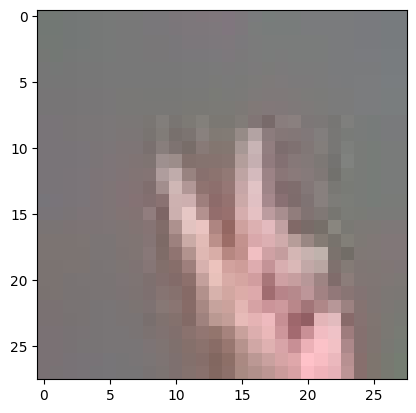

예측확률분포: [5.9394056e-06 1.9900750e-09 9.9999398e-01]
라벨: 1, 예측결과: 2


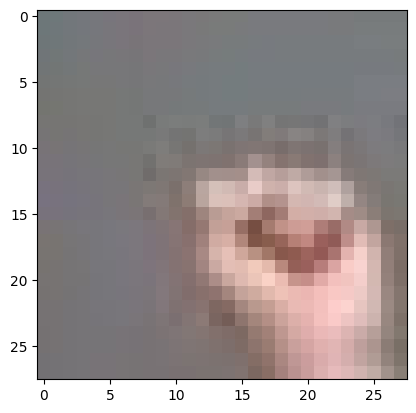

예측확률분포: [9.7627676e-01 3.3334349e-05 2.3689872e-02]
라벨: 1, 예측결과: 0


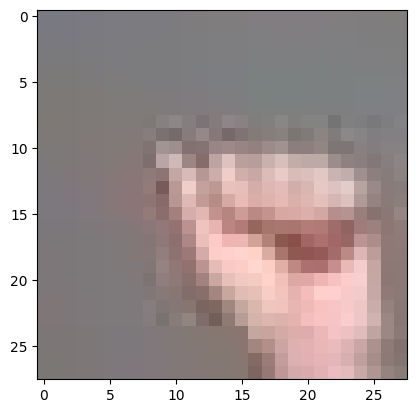

예측확률분포: [1.9819897e-03 1.3360452e-04 9.9788433e-01]
라벨: 0, 예측결과: 2


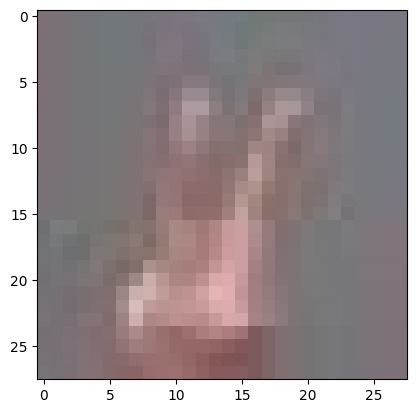

예측확률분포: [9.9808133e-01 1.0455608e-03 8.7303156e-04]
라벨: 1, 예측결과: 0


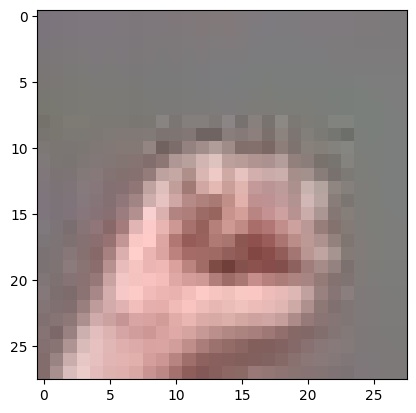

In [108]:
# 틀린 이미지 확인
predicted_result = model.predict(x_test_combined)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

리사이징된 이미지가 많이 뭉개진 것으로 확인되었습니다.

그래서 원래 사이즈의 데이터를 다시 불러와서 학습을 진행해봤습니다.

# 모델 학습 (리사이징 생략)

In [40]:
def load_raw_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    imgs = []
    labels = []

    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(0)   # 가위 : 0
        idx = idx + 1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(1)   # 바위 : 1
        idx = idx + 1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(2)   # 보 : 2
        idx = idx + 1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return np.array(imgs), np.array(labels)

In [89]:
image_dir_path_user1_raw = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보(raw)/환철"

x_train_raw, y_train_raw = load_raw_data(image_dir_path_user1_raw)
x_train_raw_norm = x_train_raw/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_raw shape: {}".format(x_train_raw.shape))
print("y_train_raw shape: {}".format(y_train_raw.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_raw shape: (300, 224, 224, 3)
y_train_raw shape: (300,)


In [93]:
image_dir_path_user2_raw = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보(raw)/소민"

x_test_user2_raw, y_test_user2_raw = load_raw_data(image_dir_path_user2_raw)
x_test_user2_raw_norm = x_test_user2_raw/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_user2_raw shape: {}".format(x_test_user2_raw.shape))
print("y_test_user2_raw shape: {}".format(y_test_user2_raw.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_user2_raw shape: (300, 224, 224, 3)
y_test_user2_raw shape: (300,)


In [94]:
image_dir_path_user3_raw = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보(raw)/소민"

(x_test_user3_raw, y_test_user3_raw)=load_raw_data(image_dir_path_user3_raw)
x_test_user3_raw_norm = x_test_user3_raw/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_user3_raw shape: {}".format(x_test_user3_raw.shape))
print("y_test_user3_raw shape: {}".format(y_test_user3_raw.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_user3_raw shape: (300, 224, 224, 3)
y_test_user3_raw shape: (300,)


In [98]:
# 모델 정의
n_channel_1=32
n_channel_2=64
n_dense=64

model_raw=keras.models.Sequential()
model_raw.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(224,224,3)))
model_raw.add(keras.layers.MaxPool2D(2,2))
model_raw.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model_raw.add(keras.layers.MaxPooling2D((2,2)))
model_raw.add(keras.layers.Flatten())
model_raw.add(keras.layers.Dense(n_dense, activation='relu'))
model_raw.add(keras.layers.Dense(3, activation='softmax'))

model_raw.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,587 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# 모델 학습
model_raw.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_raw.fit(x_train_raw_norm, y_train_raw, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4150 - loss: 7.3460
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.4954 - loss: 0.9849
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8646 - loss: 0.6617
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9776 - loss: 0.1946
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9918 - loss: 0.0887
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9942 - loss: 0.0367
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 1.0000 - loss: 0.0112
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 1.0000 - loss: 0.0026
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 1.0000 - loss: 0.0017
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 8.7689e-04


In [100]:
# 분류 결과 (소민님 이미지)
test_loss, test_accuracy = model_raw.evaluate(x_test_user2_raw_norm, y_test_user2_raw, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 12s - 1s/step - accuracy: 0.3333 - loss: 8.9280
test_loss: 8.928023338317871 
test_accuracy: 0.3333333432674408


In [101]:
# 분류 결과 (승우님 이미지)
test_loss, test_accuracy = model_raw.evaluate(x_test_user3_raw_norm, y_test_user3_raw, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 8s - 780ms/step - accuracy: 0.3333 - loss: 8.9280
test_loss: 8.928023338317871 
test_accuracy: 0.3333333432674408


제 이미지가 학습에 적합하지 않은 것이 확실합니다.

이전처럼 세명의 사진을 합친 다음 train, test으로 나눈 후 학습 진행해보겠습니다

## 학습 데이터 수정 후
___
- 이전처럼 세명의 데이터를 모두 합친 다음, 30% 만 검증 데이터로 활용하였습니다

In [109]:
# train/test split
from sklearn.model_selection import train_test_split

x_combined_raw = np.concatenate((x_train_raw, x_test_user2_raw, x_test_user3_raw), axis=0)
y_combined_raw = np.concatenate((y_train_raw, y_test_user2_raw, y_test_user3_raw), axis=0)

x_combined_raw_norm = x_combined_raw / 255.0

x_train_combined_raw, x_test_combined_raw, y_train_combined_raw, y_test_combined_raw = train_test_split(
    x_combined_raw_norm, y_combined_raw, test_size=0.3, random_state=42, stratify=y_combined_raw
)

print("Training data shape:", x_train_combined_raw.shape)
print("Testing data shape:", x_test_combined_raw.shape)

Training data shape: (630, 224, 224, 3)
Testing data shape: (270, 224, 224, 3)


In [113]:
model_raw.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_raw.fit(x_train_combined_raw, y_train_combined_raw, epochs=10) # Changed to use combined training data

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.4903 - loss: 3.3982
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.6583 - loss: 0.7708
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.7766 - loss: 0.5091
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.9051 - loss: 0.2789
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9766 - loss: 0.1237
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9905 - loss: 0.0577
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9673 - loss: 0.1215
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9891 - loss: 0.0919
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9861 - loss: 0.0569
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9973 - loss: 0.0117


In [114]:
# 분류 결과
test_loss, test_accuracy = model_raw.evaluate(x_test_combined_raw, y_test_combined_raw, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

9/9 - 6s - 695ms/step - accuracy: 0.9852 - loss: 0.0291
test_loss: 0.02905084565281868 
test_accuracy: 0.9851852059364319


학습 데이터 수정 후 분류 결과입니다.

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 712ms/step
예측확률분포: [5.9937825e-05 5.3266376e-06 9.9993461e-01]
라벨: 0, 예측결과: 2


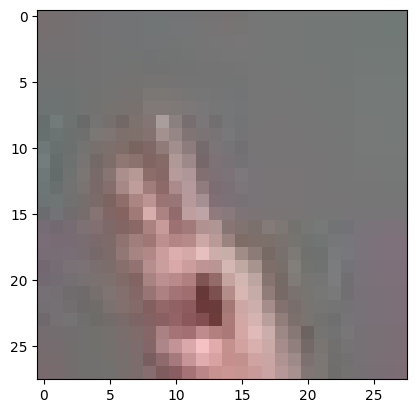

예측확률분포: [1.1787208e-04 3.4651700e-03 9.9641699e-01]
라벨: 0, 예측결과: 2


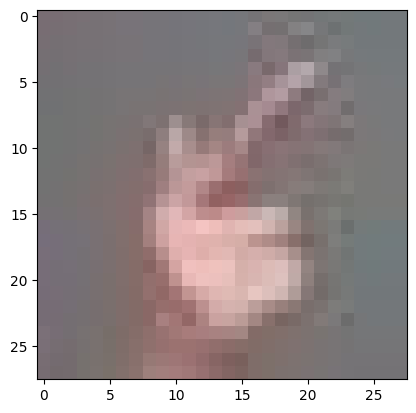

예측확률분포: [0.00480666 0.98946357 0.00572974]
라벨: 2, 예측결과: 1


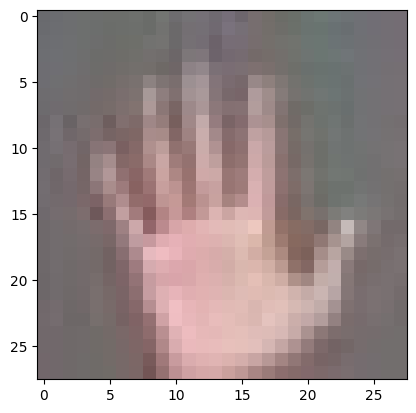

예측확률분포: [0.9833514  0.00348019 0.01316839]
라벨: 2, 예측결과: 0


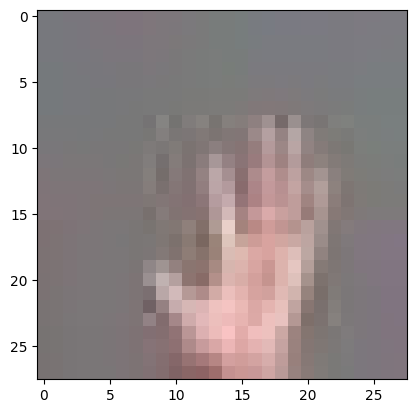

예측확률분포: [2.8639354e-04 9.9854606e-01 1.1674782e-03]
라벨: 2, 예측결과: 1


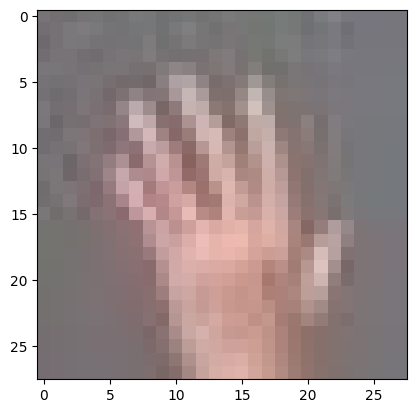

In [115]:
# 틀린 이미지 확인
predicted_result = model_raw.predict(x_test_combined_raw)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

총평.
- 동료의 이미지를 활용해 이미지 분류 실습을 진행하였습니다.
- training 성능은 역시 의미가 없었습니다. test 성능이 중요하겠습니다.
- tensorflow를 활용한 코드와 친해지려면 시간을 꽤 투자해야할 것 같습니다.